In [15]:
from bs4 import BeautifulSoup
html = '''
<html>
    <body>
        <h1 class="a1">Hello, BeautifulSoup!</h1>
    </body>
</html>
'''

soup = BeautifulSoup(html, "html.parser")
h1_element = soup.h1
print(type(soup))
print(type(h1_element))
print(h1_element.attrs)
print(h1_element.name)
print(h1_element.get_text())
print(h1_element.string)
print(h1_element.text)

<class 'bs4.BeautifulSoup'>
<class 'bs4.element.Tag'>
{'class': ['a1']}
h1
Hello, BeautifulSoup!
Hello, BeautifulSoup!
Hello, BeautifulSoup!


In [16]:
from bs4 import BeautifulSoup
html = "<html><body><p class='content'>This is a paragraph.</p></body></html>"
soup = BeautifulSoup(html, "html.parser")
p_tag = soup.find("p")  # 找到第一個 <p> 標籤
print(type(p_tag))
print(p_tag.attrs)
print(p_tag.name)
print(p_tag.get_text())
print(p_tag.string)
print(p_tag.text)

<class 'bs4.element.Tag'>
{'class': ['content']}
p
This is a paragraph.
This is a paragraph.
This is a paragraph.


In [17]:
html = """
<html>
    <body>
        <p class='content'>Paragraph 1</p>
        <p class='content'>Paragraph 2</p>
    </body>
</html>
"""
soup = BeautifulSoup(html, "html.parser")
print(soup.p)
p_elements = soup.find_all("p", class_="content")  # 找到所有 class 為 content 的 <p> 標籤
print(type(p_elements))
for elem in p_elements:
    print(elem.string)

<p class="content">Paragraph 1</p>
<class 'bs4.element.ResultSet'>
Paragraph 1
Paragraph 2


In [18]:
import requests
from requests import Response
url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
response = requests.get(url)
response_txt = response.text

from bs4 import BeautifulSoup
soup = BeautifulSoup(response_txt, "html.parser")
soup.find_all("meta")


[<meta charset="utf-8"/>,
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>,
 <meta content="臺灣銀行匯率利率黃金牌價查詢" name="description"/>,
 <meta content="" name="keywords"/>,
 <meta content="width=device-width, initial-scale=1, user-scalable=no" name="viewport"/>,
 <meta content="telephone=no" name="format-detection"/>,
 <meta content="https://www.bot.com.tw/assets/images/bot-og-image_480x480.png" property="og:image"/>,
 <meta content="index,follow" name="robots">
 <link href="/favicon.ico" rel="icon" type="image/x-icon"/>
 <link href="/Content/css/font-awesome.min.css" rel="stylesheet"/>
 <link href="/Content/css/jquery-ui.min.css" rel="stylesheet"/>
 <link href="/Content/main-3.8.0.css" rel="stylesheet"/>
 <style nonce="Q+vCokZ5xr+YXWNPqoMG0Oo+yPSCex4yKrkANPfQdnw=">
     h1.hero__header { font-size:1.5625rem }
     
     
     .bank {display:none}
     </style>
 <noscript>
 <style>
             table th.noscript {
                 display: table-cell;
             }
 
             tab

In [19]:
import requests
from requests import Response
url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
response = requests.get(url)
print(response.text)

<!DOCTYPE html>
<html lang="zh-TW" class="no-js">
<head>
    <meta charset="utf-8" />
    <title>臺灣銀行牌告匯率</title>
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="description" content="臺灣銀行匯率利率黃金牌價查詢">
    <meta name="keywords" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=no">
    <meta name="format-detection" content="telephone=no">
    <meta property="og:image" content="https://www.bot.com.tw/assets/images/bot-og-image_480x480.png">
        <meta name="robots" content="index,follow" />

    <link rel="icon" type="image/x-icon" href="/favicon.ico">
    <link rel="stylesheet" href="/Content/css/font-awesome.min.css">






    <link rel="stylesheet" href="/Content/css/jquery-ui.min.css">
    <link rel="stylesheet" href="/Content/main-3.8.0.css">
    <style nonce="Q+vCokZ5xr+YXWNPqoMG0Oo+yPSCex4yKrkANPfQdnw=">
    h1.hero__header { font-size:1.5625rem }
    
    
    .bank {display:none}
    </style>

    <nos

In [20]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# 尋找帶有特定 title 屬性的表格
rate_table = soup.find('table', {'title': '牌告匯率'})

# 印出表格內容
#print(rate_table)

# 取得所有幣別和現金匯率資料
currency_rows = rate_table.tbody.find_all('tr')
#print(type(currency_rows)) 
#print(currency_rows)
currency_list = []
for row in currency_rows:
    currency_dict = {}
    #print(type(row))
    # 取行中的幣別資料
    currency = row.find("td", attrs={"data-table": "幣別"}).find("div", class_="visible-phone").text.strip()
    currency_dict["幣別"] = currency
    # 取得即期買入匯率
    currency_get = row.find("td", attrs={"data-table": "本行現金買入"}).text.strip()
    currency_dict["現金買入"] = currency_get
    # 取得即期賣出匯率
    currency_send = row.find("td", attrs={"data-table": "本行現金賣出"}).text.strip()
    currency_dict["現金賣出"] = currency_send
    currency_sale ={"現金賣出","currency_send"}
    #print(f"幣別: {currency}, 現金買入: {currency_get}, 現金賣出: {currency_send}")
    #print("==========")
    currency_list.append(currency_dict)
#print(currency_list)


In [21]:
def filter_func(item):
    if item['現金買入'] == '-':
        return False
    else:
        return True

filtered_currency_list = list(filter(filter_func,currency_list))


def change_func(n):
    n["現金買入"] = float(n["現金買入"])
    n["現金賣出"] = float(n["現金賣出"])
    return n

clear_list = list(map(change_func,filtered_currency_list))




In [22]:
import pandas as pd
df = pd.DataFrame(clear_list)

#降冪排序
df.sort_values(by='現金買入',ascending=False)

,幣別,現金買入,現金賣出
2,英鎊 (GBP),41.24000,43.36000
6,瑞士法郎 (CHF),36.51000,37.71000
12,歐元 (EUR),34.77000,36.11000
0,美金 (USD),32.43500,33.10500
5,新加坡幣 (SGD),24.09000,25.00000
4,加拿大幣 (CAD),22.35000,23.26000
3,澳幣 (AUD),20.32000,21.10000
8,紐元 (NZD),18.27000,19.12000
15,馬來幣 (MYR),6.41200,7.93700
16,人民幣 (CNY),4.43700,4.59900


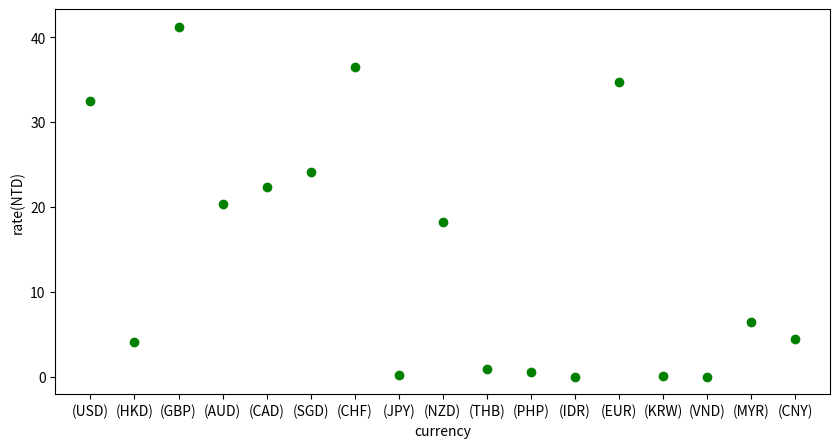

In [23]:
import matplotlib.pyplot as plt
# 1.製作figure(畫布)
fig = plt.figure(figsize=(10, 5))
#add_subplot實體方法用於在Figure對象中添加一個子圖（subplot），
# 第一個參數表示將Figure分成幾行，第二個參數表示將Figure分成幾列。
#第三個參數表示要在畫布上畫幾張圖
ax_1 = fig.add_subplot(1, 1, 1)
#用plot實體方法畫圖，裡面放的參數就是你的資料
ax_1.plot(df['幣別'].apply(lambda x: x.split()[-1]),df['現金買入'],'go')
ax_1.set_xlabel('currency')
ax_1.set_ylabel('rate(NTD)')
#顯示圖表
plt.show()

In [24]:
import wget
wget.download("https://github.com/roberthsu2003/__2025_01_04_chihlee__/raw/refs/heads/main/ChineseFont.ttf")

'ChineseFont (1).ttf'

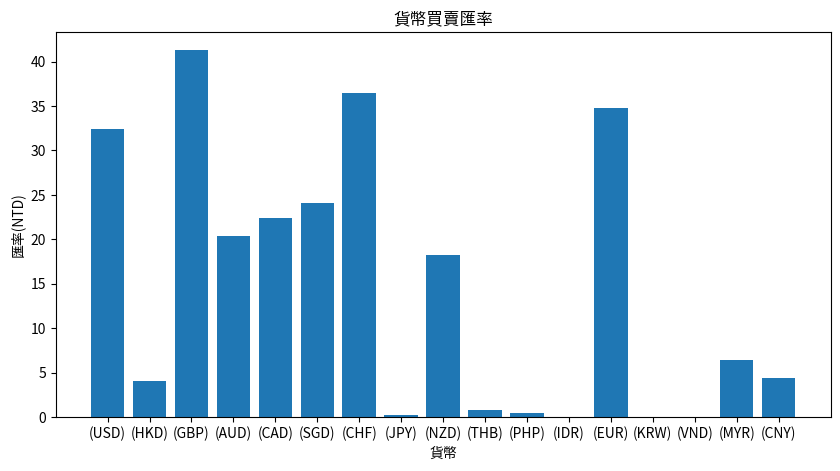

In [ ]:
#安裝matplotlib.font_manager模組中的fontManager實體並匯入
from matplotlib.font_manager import fontManager
import matplotlib as mlp
#使用fontManager的實體方法addfont，將ChineseFont.ttf匯入到matplotlib
fontManager.addfont('ChineseFont.ttf')
#使用matplotlib模組中的rc函數，將ChineseFont.ttf作為matplotlib的預設字型，此時就可以打中文了
mlp.rc('font', family='ChineseFont')
# 1.製作figure
fig = plt.figure(figsize=(10, 5))
ax_1 = fig.add_subplot(1, 1, 1)
ax_1.bar(df['幣別'].apply(lambda x: x.split()[-1]),df['現金買入'])
ax_1.set_title('貨幣買賣匯率')
ax_1.set_xlabel('貨幣')
ax_1.set_ylabel('匯率(NTD)')
plt.show()